<img src="https://media.giphy.com/avatars/saveaheart/yw5TEQLOFkP1.gif" width=35%>


<h1 style="padding:8px;background-color:#DC143C;margin:0;color:white;font-family:Century Gothic;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">INFORMATION</h1>

* **This Dataset contains the information about the patients like age ,sex , blood pressure, smoke, diabetes,ejection fraction, creatinine phosphokinase, serum_creatinine, serum_sodium, time and we have to predict their DEATH EVENT. There are some factors that affects Death Event, This notebook attempts to perform Exploratory Data Analysis and eventually train a Machine Learning model on it for better understanding of the data.**
* **Analysis shows the significance of heart health and the major causes of heart failure.**

### Questions to be answered.

* Does Smoking affect on heart disease?
* Does a person's age affect their risk of heart attack?
* Does having high blood pressure put you at risk for a heart attack?
* Does the level of serum creatinine and serum sodium in the blood eventually operate as a risk factor for heart attacks?

### Maching Learning Model used.

1. Logistic Regression
2. Decision Tree
3. Random Forest

**Table of contents:**
    
1. [IMPORTING LIBRARIES](#1)
2. [DATA PREPROCESSING](#2)
3. [CHECKING MISSING VALUE](#3)
3. [EXPLORATORY DATA ANALYSIS (EDA)](#4)
4. [DATA VISUALIZATION & TRANSFORMATION](#5)
5. [SPLITING THE DATA INTO TRAINING SET & TEST SET](#6)
6. [FEATURE SELECTION](#7)
7. [APPLY MACHINE-LEARNING MODEL](#8) 



<h1 style="padding:8px;background-color:#DC143C;margin:0;color:white;font-family:Century Gothic;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">IMPORTING LIBRARIES</h1> <a class="anchor" id="1"></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

<h1 style="padding:8px;background-color:#DC143C;margin:0;color:white;font-family:Century Gothic;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">DATA PREPROCESSING</h1> <a class="anchor" id="2"></a> 

In [2]:
data = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


* **age**: Age of the patient 
* **anaemia**: Haemoglobin level of patient (Boolean)
* **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
* **diabetes**: If the patient has diabetes (Boolean)
* **ejection_fraction**: Percentage of blood leaving the heart at each contraction
* **high_blood_pressure**: If the patient has hypertension (Boolean)
* **platelets**: Platelet count of blood (kiloplatelets/mL)
* **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
* **serum_sodium**: Level of serum sodium in the blood (mEq/L)
* **sex**: Sex of the patient
* **smoking**: If the patient smokes or not (Boolean)
* **time**: Follow-up period (days)
* **DEATH_EVENT**: If the patient deceased during the follow-up period (Boolean)

*total 13 columns*

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB



<h1 style="padding:8px;background-color:#DC143C;margin:0;color:white;font-family:Century Gothic;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">CHECKING MISSING VALUES</h1> <a class="anchor" id="3"></a>

In [6]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

* **There's no missing value in dataset.**

**We can see that there's no missing value in dataset. but in case we have missing value, we can still remove it by deleting those rows but it can cause the information loss.**

<h1 style="padding:8px;background-color:#DC143C;margin:0;color:white;font-family:Century Gothic;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">EXPLORATORY DATA ANALYSIS (EDA)</h1> <a class="anchor" id="5"></a> 

Why we need to do EDA?
Understanding the given dataset and helps clean up the given dataset.
It gives you a clear picture of the features and the relationships between them.
Providing guidelines for essential variables and leaving behind/removing non-essential variables.
Handling Missing values or human error.
Identifying outliers.
EDA process would be maximizing insights of a dataset.
This process is time-consuming but very effective

**Note:**

**Sex - Gender of patient Male = 1, Female =0**

**Age - Age of patient**

**Diabetes - 0 = No, 1 = Yes**

**Anaemia - 0 = No, 1 = Yes**

**High_blood_pressure - 0 = No, 1 = Yes**

**Smoking - 0 = No, 1 = Yes**

**DEATH_EVENT - 0 = No, 1 = Yes**

<h1 style="padding:8px;background-color:#DC143C;margin:0;color:white;font-family:Century Gothic;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">DATA VISUALIZATION & TRANSFORMATION</h1> <a class="anchor" id="5"></a> 

In [7]:
categorical_data = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]
continuous_data = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]

In [8]:
# for subplots
def subplts(r=1, c=1, fs=(20, 8)):
    return plt.subplots(r, c, figsize=fs)
# count plot
def plot_count(x, ax, d=data):
    sns.countplot(data=d, x=x, ax=ax)
    # pie chart using pandas
def plot_pie(feat, ax, title):
    data[f"{feat}"].value_counts().plot.pie(ax=ax, autopct="%1.1f%%",
                                          shadow=True, explode=[0, 0.1]).set_title(f"{title}")
    # histogram without hue
def plot_hist(x, ax, d=data, kde=True, log=False):
    sns.histplot(data=d, x=x, ax=ax, kde=kde, log_scale=log)
    # boxplot single
def plot_box(x, ax, d=data):
    sns.boxplot(data=d, x=x, ax=ax)
    
# boxplot with one categorical
def plot_boxcat(x, y, ax, d=data):
    sns.boxplot(data=d, x=x, y=y, ax=ax)

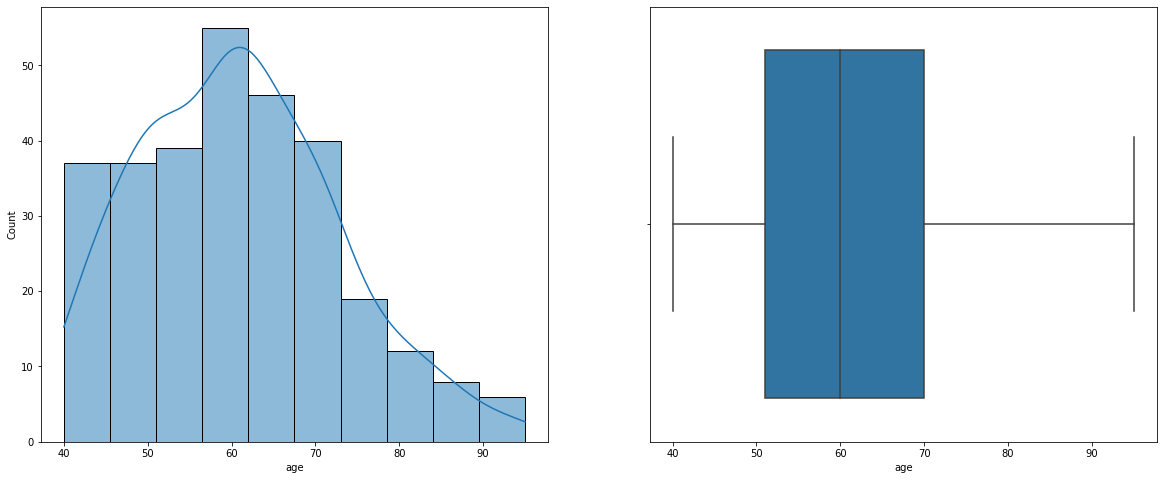

In [9]:
fig, ax = subplts(1, 2)

plot_hist("age", ax[0])
plot_box("age", ax[1])

plt.show()

REMARKS:
* **Minimum age recorded in this dataset is 40 years**
* **Maximum age is 95 years**
* **Most people are 60 years old in this dataset**

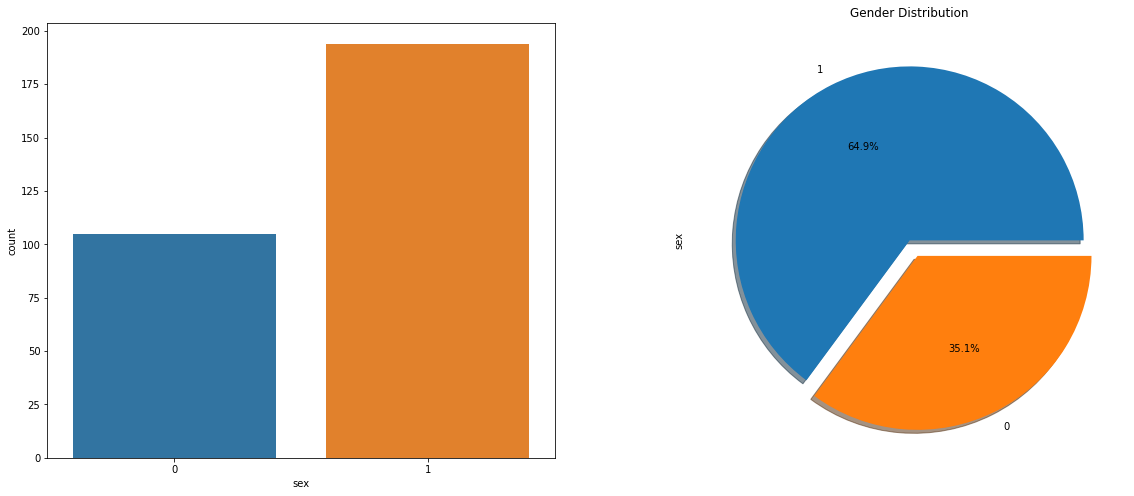

In [10]:
fig, ax = subplts(1, 2)

plot_count("sex", ax[0])
plot_pie("sex", ax[1], "Gender Distribution")

plt.show()

REMARKS:
* **64.9% is male population.**
* **35.1% is Female population**

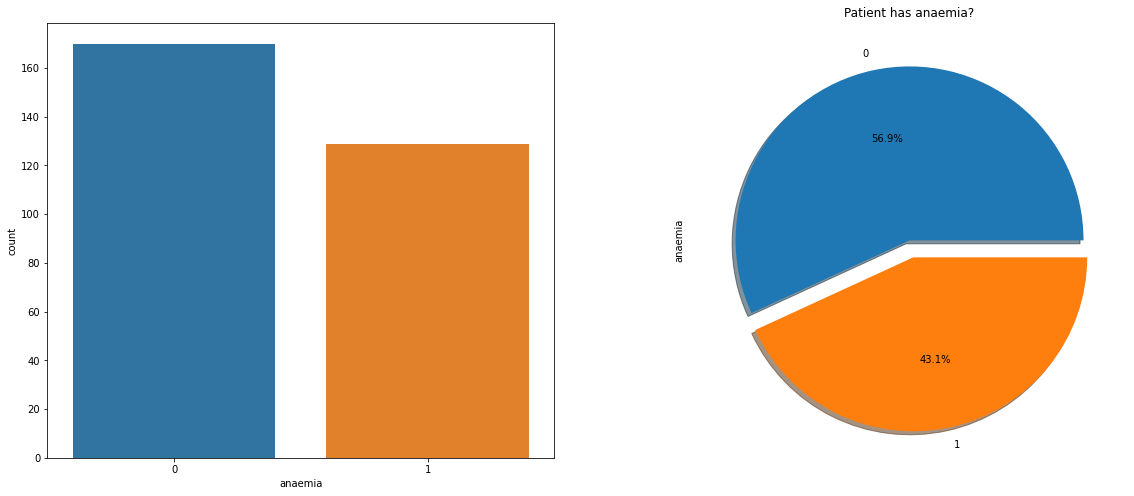

In [11]:
fig, ax = subplts(1, 2)

plot_count("anaemia", ax[0])
plot_pie("anaemia", ax[1], "Patient has anaemia?")

plt.show()

REMARKS:
* **56.9% people DO NOT have anaemia**
* **43.1% people have anaemia**

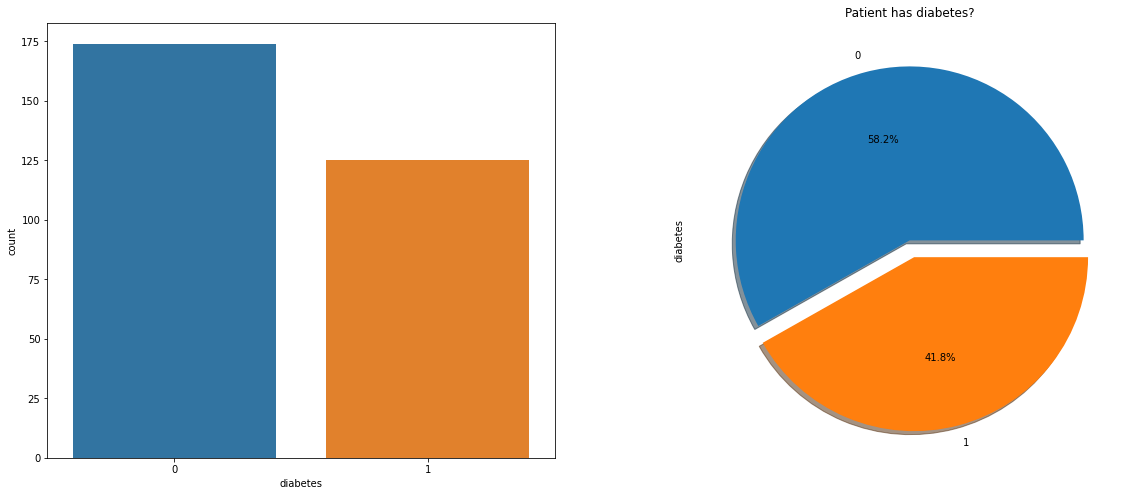

In [12]:
fig, ax = subplts(1, 2)

plot_count("diabetes", ax[0])
plot_pie("diabetes", ax[1], "Patient has diabetes?")

plt.show()

REMARKS:
* **58.2% people DOES NOT have Diabetes**
* **41.8% people have Diabetes**

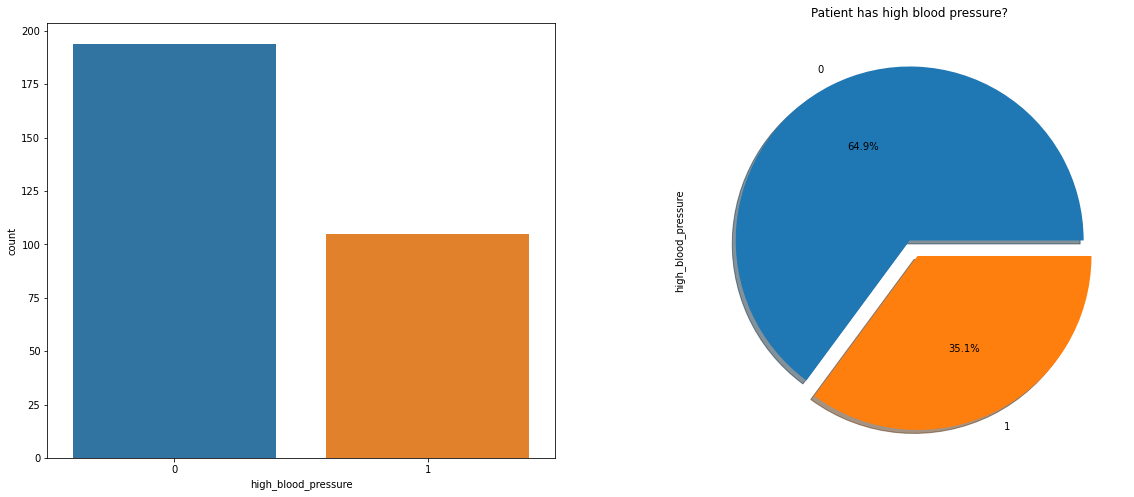

In [13]:
fig, ax = subplts(1, 2)

plot_count("high_blood_pressure", ax[0])
plot_pie("high_blood_pressure", ax[1], "Patient has high blood pressure?")

plt.show()

REMARKS:
* **64.9% people do NOT have High Blood Pressure** 
* **35.1% have high blood pressure**

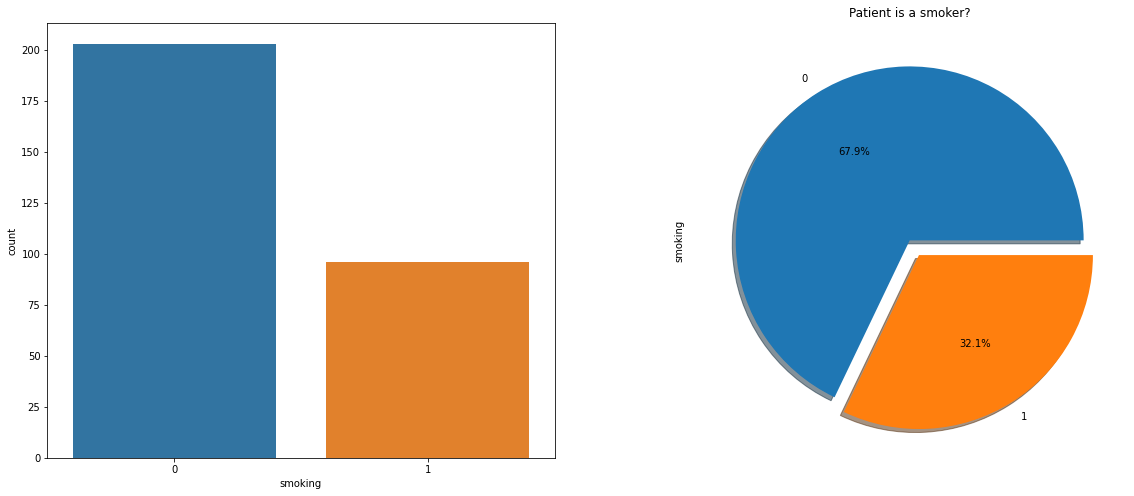

In [14]:
fig, ax = subplts(1, 2)

plot_count("smoking", ax[0])
plot_pie("smoking", ax[1], "Patient is a smoker?")

plt.show()

REMARKS:
* **67.9% people do NOT smoke**
* **32.1% people are smokers**

### * **Correlation of DEATH EVENTS with Categorical and Continuous variables** 

In [15]:
datav1 = data.copy()
columns = datav1.columns.tolist()

In [16]:
# Plotting the impact of categorical variables on DEATH_EVENT
Cat_columns = list()
numerical_values = list()
for column in columns : 
    if datav1[column].nunique() <= 2 :
        Cat_columns.append(column)
    else : 
        numerical_values.append(column)
Cat_columns.remove("DEATH_EVENT")

cat_cols = Cat_columns
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)


def cat_graph(data_,attr,out):
    sns.catplot(x=attr, hue=out, kind="count",palette="crest", edgecolor=".6",data= data_)
    plt.title( 'DEATH_EVENT occurrence in %s  attribute' %attr)
    plt.show()
    
    return datav1[[out,attr]].groupby([attr,out], as_index=False).size().sort_values(by=attr, ascending=False)

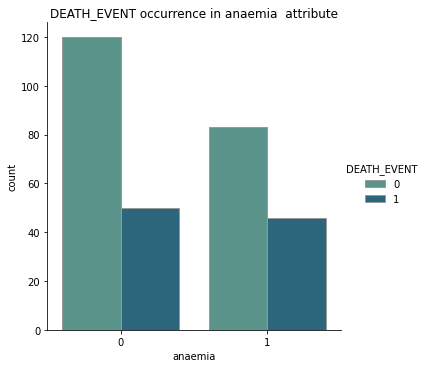

   anaemia  DEATH_EVENT  size
2        1            0    83
3        1            1    46
0        0            0   120
1        0            1    50 



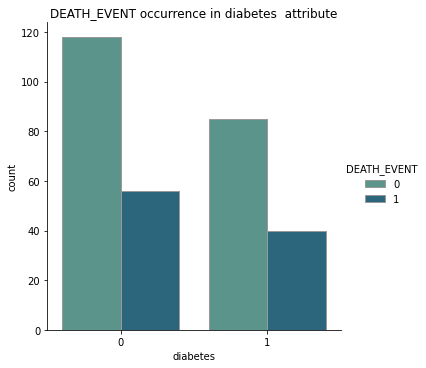

   diabetes  DEATH_EVENT  size
2         1            0    85
3         1            1    40
0         0            0   118
1         0            1    56 



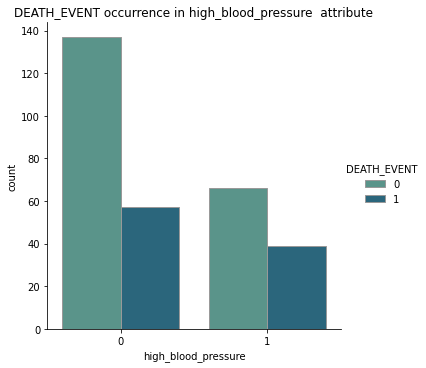

   high_blood_pressure  DEATH_EVENT  size
2                    1            0    66
3                    1            1    39
0                    0            0   137
1                    0            1    57 



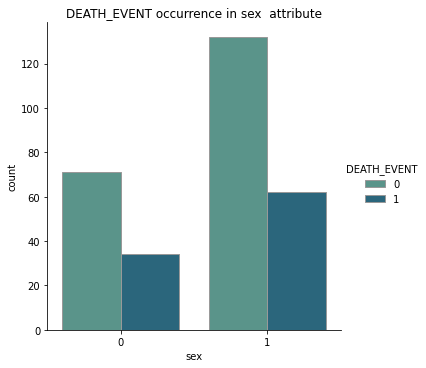

   sex  DEATH_EVENT  size
2    1            0   132
3    1            1    62
0    0            0    71
1    0            1    34 



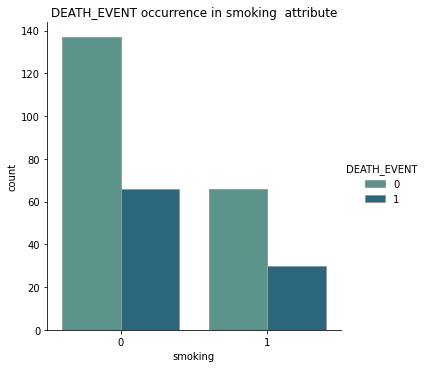

   smoking  DEATH_EVENT  size
2        1            0    66
3        1            1    30
0        0            0   137
1        0            1    66 



In [17]:
for attr in Cat_columns :
    print(cat_graph(datav1,attr,"DEATH_EVENT"),'\n')


**Note:**

**1. Here, out of 96 smokers have a 31% risk of suffering a heart attack(i.e 30 deaths, 66 survived), whereas 203 non-smokers have a 32.5% chance (i.e 66 deaths, 137 survived). However, generally smokers experience more deaths than non-smokers do. In this dataset number of smoker are high and number of death is low. Therefore, unstable data can lead to such issues.**

**2. People with high blood pressure have a 37.14% chance of having a heart attack, while those with normal blood pressure have a 29.38% chance.**

**3. Anaemia significantly increases a person's risk of having a heart attack, increasing that risk from 29.41% to 35.66% when compared to a
   person without anaemia.**

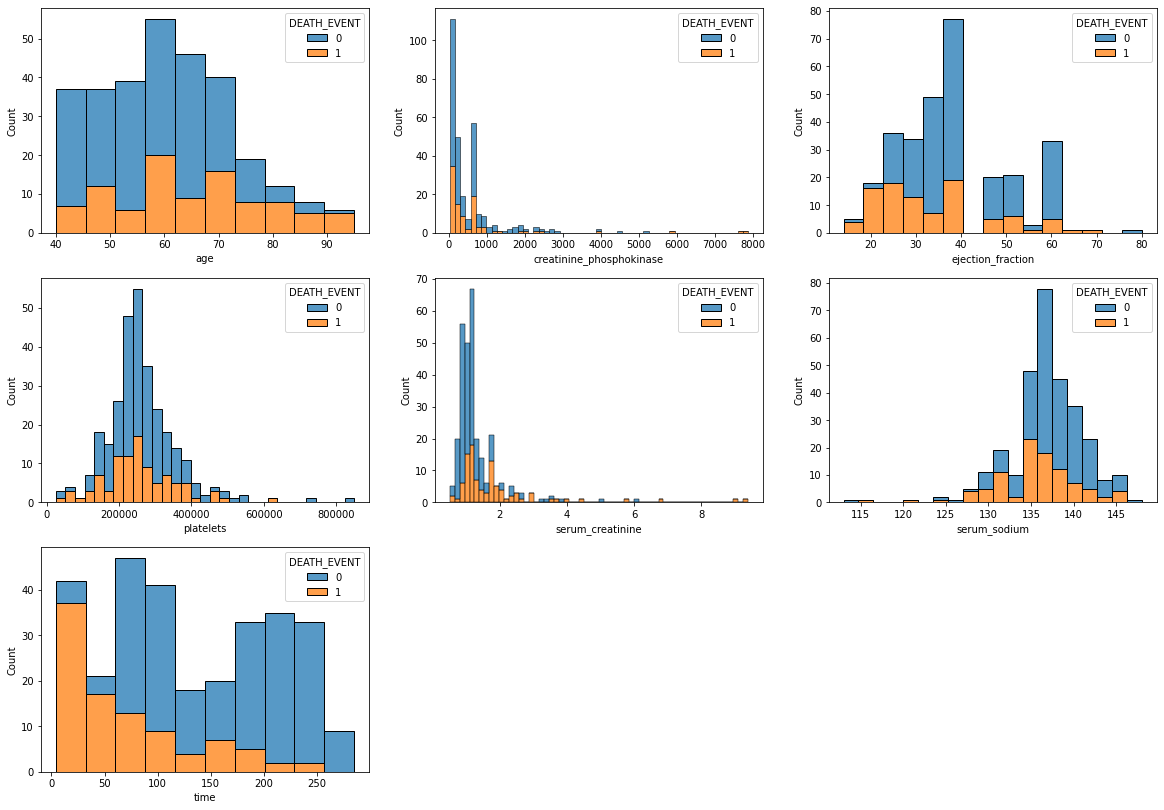

In [18]:
# Plotting the impact of continuous variables on DEATH_EVENT

plt.figure(figsize=(20,19))
for j,con in enumerate(continuous_data):
    plt.subplot(4,3,j+1)
    sns.histplot(data = data, x= con, hue = "DEATH_EVENT", multiple="stack")
plt.show()

<h1 style="padding:8px;background-color:#DC143C;margin:0;color:white;font-family:Century Gothic;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">SPLITING THE DATA INTO TRAINING SET & TEST SET</h1> <a class="anchor" id="6"></a>

In [19]:
#DECLARE TARGET VARIABLE
X = data.drop(columns = ["DEATH_EVENT"])
y = data["DEATH_EVENT"]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
print(X_train)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
134  81.0        0                      4540         0                 35   
145  50.0        0                       185         0                 30   
63   45.0        0                       582         0                 35   
292  52.0        0                       190         1                 38   
284  50.0        1                        54         0                 40   
..    ...      ...                       ...       ...                ...   
251  55.0        0                       572         1                 35   
192  50.0        1                       121         1                 40   
117  85.0        1                       102         0                 60   
47   60.0        0                       582         1                 38   
172  70.0        1                       171         0                 60   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [22]:
print(y_train)

134    0
145    0
63     1
292    0
284    0
      ..
251    0
192    0
117    0
47     1
172    0
Name: DEATH_EVENT, Length: 239, dtype: int64


In [23]:
print(X_test)

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
206  40.000        1                       101         0                 40   
188  60.667        1                       151         1                 40   
12   45.000        1                       981         0                 30   
219  55.000        0                       582         1                 35   
237  70.000        0                       232         0                 30   
136  65.000        1                        59         1                 60   
228  65.000        0                        56         0                 25   
205  50.000        1                       167         1                 45   
52   60.000        0                      3964         1                 62   
108  63.000        0                       936         0                 38   
240  70.000        0                        81         1                 35   
15   82.000        1                       379      

In [24]:
print(y_test)

206    0
188    0
12     1
219    0
237    0
136    0
228    0
205    0
52     1
108    0
240    0
15     1
184    1
246    1
22     1
74     1
269    0
90     0
227    0
255    0
190    0
103    0
124    1
129    0
220    1
116    0
194    1
285    0
294    0
249    0
92     0
66     1
8      1
122    0
217    1
150    1
176    0
182    1
298    0
5      1
263    0
89     0
81     0
34     1
55     1
139    0
234    0
64     0
7      1
45     1
73     0
291    0
173    0
106    0
59     1
230    1
168    0
26     1
283    0
153    0
Name: DEATH_EVENT, dtype: int64


<h1 style="padding:8px;background-color:#DC143C;margin:0;color:white;font-family:Century Gothic;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">FEATURE SELECTION</h1> <a class="anchor" id="7"></a>

### **Key benefits of feature selection**
**1. Decreases over-  fitting** 

**2. Improves Accuracy**

**3. Reduces Training Time**  

In [25]:
from sklearn.feature_selection import SelectKBest
best_features = SelectKBest(k=10)
features_ranking = best_features.fit(data.drop(['DEATH_EVENT'], axis=1), data['DEATH_EVENT'])
ranking_dictionary = {}
for i in range(len(features_ranking.scores_)):
    ranking_dictionary[data.columns[i]] = round(features_ranking.scores_[i], 3)

asc_sort = sorted(ranking_dictionary.items(), key = lambda kv:(kv[1], kv[0]))

for i, j in asc_sort:
    print(i, ':', j)

diabetes : 0.001
sex : 0.006
smoking : 0.047
platelets : 0.719
creatinine_phosphokinase : 1.173
anaemia : 1.31
high_blood_pressure : 1.882
serum_sodium : 11.765
age : 20.436
ejection_fraction : 23.094
serum_creatinine : 28.158
time : 114.181


* **In Feature Selection platelets, time, creatinine_phosphokinase, ejection_fraction are more considerable.**

<h1 style="padding:8px;background-color:#DC143C;margin:0;color:white;font-family:Century Gothic;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">APPLY MACHINE-LEARNING MODEL</h1> <a class="anchor" id="8"></a>

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,recall_score,f1_score,precision_score


### Logistic Regression Classifier
Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1)

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png" width=50%>

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
log = accuracy_score(y_test,y_pred)*100
print("LogisticRegression Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")


LogisticRegression Accuracy Score: 73.33333333333333 %
Recall Score: 39.130434782608695 %
Precision Score: 81.81818181818183 %
F1 Score: 52.94117647058824 %


### Decision Tree Classifier

Decision Tree algorithm is supervised learning algorithm. It can be used for solving regression and classification problems too. The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).
It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar.

<img src="https://dpbnri2zg3lc2.cloudfront.net/en/wp-content/uploads/old-blog-uploads/decision-tree-example-2-1.jpg" width=50%>


In [28]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
log = accuracy_score(y_test,y_pred)*100
print("DecisionTreeClassifier Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")



DecisionTreeClassifier Accuracy Score: 75.0 %
Recall Score: 56.52173913043478 %
Precision Score: 72.22222222222221 %
F1 Score: 63.41463414634146 %


### Random Forest Classifier
Random Forest is a powerful and versatile supervised machine learning algorithm that grows multiple decision trees which are merged together for a more accurate prediction.
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

<img src="https://miro.medium.com/max/789/1*VHDtVaDPNepRglIAv72BFg.jpeg" width=50%>

In [29]:
rfc= RandomForestClassifier(random_state=777)
rfc = rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
log = accuracy_score(y_test,y_pred)*100
print("RandomForest Accuracy Score:",accuracy_score(y_test,y_pred)*100,"%")
print("Recall Score:",recall_score(y_test,y_pred)*100,"%")
print("Precision Score:",precision_score(y_test,y_pred)*100,"%")
print("F1 Score:",f1_score(y_test,y_pred)*100,"%")


RandomForest Accuracy Score: 83.33333333333334 %
Recall Score: 65.21739130434783 %
Precision Score: 88.23529411764706 %
F1 Score: 75.0 %


<h1 style="padding:8px;background-color:#DC143C;margin:0;color:white;font-family:Century Gothic;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">CONCLUDING REMARKS</h1>

**1. The females have the percentage of 31.9% of having heart attack while men have the chance of 32.38% of having it. same for survival rate this can be because male population is higher.**

**2. Using this dataset of 299 heart failure patients, several machine learning algorithms were tested for their ability to predict mortality. out of given Machine-Learning models, RANDOM FOREST performed BEST with an overall accuracy of around 83%.**

<h1 style="padding:8px;background-color:#DC143C;margin:0;color:white;font-family:Century Gothic;font-size:200%;text-align:center;border-radius: 15px 15px;letter-spacing:0.5px;overflow:hidden;font-weight:500">REFERENCE</h1>

[https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem](http://)